## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
ab_data = pd.read_csv('ab_data.csv')
ab_data.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
ab_data.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
ab_data['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
ab_data.query('converted == 1').shape[0] / ab_data.shape[0]

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
treat = ab_data.query('group == "treatment"')
contr = ab_data.query('group == "control"')
contr['landing_page'].value_counts(), treat['landing_page'].value_counts()

(old_page    145274
 new_page      1928
 Name: landing_page, dtype: int64, new_page    145311
 old_page      1965
 Name: landing_page, dtype: int64)

f. Do any of the rows have missing values?

In [7]:
ab_data.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
treat2 = treat[treat['landing_page'] == 'new_page']
contr2 = contr[contr['landing_page'] == 'old_page']

df2 = treat2.append(contr2)
df2.head(), df2.tail()

(   user_id                   timestamp      group landing_page  converted
 2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
 3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
 6   679687  2017-01-19 03:26:46.940749  treatment     new_page          1
 8   817355  2017-01-04 17:58:08.979471  treatment     new_page          1
 9   839785  2017-01-15 18:11:06.610965  treatment     new_page          1,
         user_id                   timestamp    group landing_page  converted
 294471   718310  2017-01-21 22:44:20.378320  control     old_page          0
 294473   751197  2017-01-03 22:28:38.630509  control     old_page          0
 294474   945152  2017-01-12 00:51:57.078372  control     old_page          0
 294475   734608  2017-01-22 11:45:03.439544  control     old_page          0
 294476   697314  2017-01-15 01:20:28.957438  control     old_page          0)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2['user_id'].nunique(), df2.shape

(290584, (290585, 5))

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2['user_id'].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [12]:
df2.drop_duplicates('user_id', inplace=True)
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [13]:
df2.query('converted == 1').shape[0] / df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [14]:
df_control = df2.query('group == "control"')
cont_convert = df_control.query('converted == 1').shape[0] / df_control.shape[0]
cont_convert

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [15]:
df_treat = df2.query('group == "treatment"')
treat_convert = df_treat.query('converted == 1').shape[0] / df_treat.shape[0]
treat_convert

0.11880806551510564

d. What is the probability that an individual received the new page?

In [16]:
print(df2.query('landing_page == "new_page"').shape[0] / df2.shape[0])
obs_diff = treat_convert - cont_convert
print(obs_diff)

0.5000619442226688
-0.0015782389853555567


e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**I would argue that no, there is no evidence to suggest that the new page leads to more conversions. Simply because 12.04% or so of the control group converted and 11.88% or so of the treatment group converted. Since it is 50/50 Simpson's Paradox is probably not at play here either.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**The null hypothosis is that the old page is as good or better than the new page, i.e. $p_{old}$ $\geq$ $p_{new}$. The alternative hypothosis is that the new page is better than the old page, i.e. $p_{new}$ $\gt$ $p_{old}$.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [17]:
pnewnull = df2.query('converted == 1').shape[0] / df2.shape[0]
pnewnull

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [18]:
poldnull = df2.query('converted == 1').shape[0] / df2.shape[0]
poldnull

0.11959708724499628

c. What is $n_{new}$?

In [19]:
nnew = df2.query('landing_page == "new_page"').shape[0]
nnew

145310

d. What is $n_{old}$?

In [20]:
nold = df2.query('landing_page == "old_page"').shape[0]
nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [21]:
new_page_converted = np.random.choice([0, 1], size=nnew, p=[1-pnewnull, pnewnull])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [22]:
old_page_converted = np.random.choice([0, 1], size=nold, p=[1-poldnull, poldnull])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [23]:
new_page_converted.mean() - old_page_converted.mean()

5.9810898112244715e-05

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [24]:
p_diffs = []
for _ in range(10000):
    new_convert = np.random.choice([0, 1], size=nnew, p=[1-pnewnull, pnewnull])
    old_convert = np.random.choice([0, 1], size=nold, p=[1-poldnull, poldnull])
    p_diffs.append(new_convert.mean() - old_convert.mean())

p_diffs = np.asarray(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

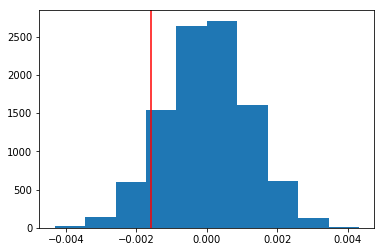

In [25]:
plt.hist(p_diffs);
plt.axvline(obs_diff, color='r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [26]:

(p_diffs > obs_diff).mean()

0.90569999999999995

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**I computed the probability that the value we observed from the data was produced by the null hypothesis. In this case that is that the old page is as effective or better than the new page. Generally speaking you would like you value caculated here (the 'p-value') to be less than 0.05, or 5%. Here it is 90%, meaning that the null produces results like this or better 90% of the time.**

**Therefore we have failed to reject the null hypothesis, and thus our conclusion is that the old page is, on average, as good as or better at converting users than the new page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"').query('converted == 1').shape[0]
convert_new = df2.query('landing_page == "new_page"').query('converted == 1').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

C:\Users\John\Anaconda\envs\py3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
'''This function takes four arguements:
1) the number of successful trials (new and old)
2) the number of trials (new and old)
3) the value of the null hypothesis (in this case 0 as the null hypothesis is that there is no difference in the proportions)
4) the alternative hypothesis (in this case 'larger' since our alternative hypothesis
is that the new page has a greater converstion rate than the old one)'''
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], value=0, alternative='larger')
z_score, p_value

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Here we used a package to calculate the z-score and p-value for our proportions. It is clear that we fail to reject the null hypothesis once again. Our p-value of 0.905 is equal to the p-value calculated above, confirming our work.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since each row is a binary choice we should use logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [29]:
df2['intercept'] = 1
df2['ab_page'] = np.where(df2['group'] == 'control', 0, 1)
df2.tail()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
294471,718310,2017-01-21 22:44:20.378320,control,old_page,0,1,0
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [30]:
mod = sm.Logit(df2['converted'], df2[['ab_page', 'intercept']])
res = mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [31]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 07 Dec 2017   Pseudo R-squ.:               8.077e-06
Time:                        15:43:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value from this regression model is 0.19, much less than that from Part II. One possible reason is that the null and alternative hypotheses are slightly different in this model. This model is looking at whether or not the landing page (here signified by the ab_page column) can predict whether or not an individual converts. So the null hypothesis is that it cannot, i.e. the page has no influence on whether or not an individual converts. The alternative hypothesis is then that the page does influence whether or not the individual converts. In Part II we were only looking at whether the new page had a higher converstion rate than the old page. If either page has a higher liklihood of converting users, the regression will pick that up. In other words, it's performing a kind of two-sided test, whereas above we were only performing a one-sided one.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Other factors can help clarify patterns we see, and prevent Simpson's paradox from rearing its head. For example, we know the conversion rate from the old page is better, but maybe that isn't due to the page, but rather what kind of user, or what country they are from. The disadvantage is sometimes you can bloat the model too much and make it impractical. The company wants to know whether or not to implement their new webpage, and if you give them a huge list of factors that influece whether an indivudal converts or not, they won't be able to make a decision.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [32]:
countries = pd.read_csv('countries.csv')
df3 = pd.merge(df2, countries, on='user_id')
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA


In [33]:
#Create dummy variables for the countries
df3['country'].value_counts()
dummy_country = pd.get_dummies(df3['country'], prefix='country')
dummy_country.head()

,country_CA,country_UK,country_US
0,0,0,1
1,0,0,1
2,1,0,0
3,0,1,0
4,1,0,0


In [34]:
final_df = df3.join(dummy_country)

#The US column will be our baseline
final_df.head()


,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,country_CA,country_UK,country_US
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,CA,1,0,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,UK,0,1,0
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,CA,1,0,0


In [35]:
#Do the regression

mod2 = sm.Logit(final_df['converted'], final_df[['ab_page','country_CA','country_UK','intercept']])
fit2 = mod2.fit()

fit2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 07 Dec 2017   Pseudo R-squ.:               2.323e-05
Time:                        15:45:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_CA    -0.0408      0.027     -1.516      0.130      -0.093       0.012
country_UK     0.0099      0.013      0.743      0.457      -0.016       0.036
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
==============================================================================
"""

**Again, these p-values are all pretty high (all above 0.1) and so it is tough to conclude that the country has a statistically significant effect on the chance of conversion. However, if there is an effect, it appears that those in Canda have a less likely chance to convert than those in the baseline country (the US, in this case). The p-value for the UK is so high drawing any conclusions would be disingenuous.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [37]:
#Now we will break the data up by country and see what effect the page has on conversion
dfUK = final_df.query('country == "UK"')
dfUS = final_df.query('country == "US"')
dfCA = final_df.query('country == "CA"')

In [38]:
UKmod = sm.Logit(dfUK['converted'], dfUK[['intercept','ab_page']])
USmod = sm.Logit(dfUS['converted'], dfUS[['intercept','ab_page']])
CAmod = sm.Logit(dfCA['converted'], dfCA[['intercept','ab_page']])

UKres = UKmod.fit()
USres = USmod.fit()
CAres = CAmod.fit()

Optimization terminated successfully.
         Current function value: 0.368106
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.366015
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.357434
         Iterations 6


In [39]:
UKres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:                72466
Model:                          Logit   Df Residuals:                    72464
Method:                           MLE   Df Model:                            1
Date:                Thu, 07 Dec 2017   Pseudo R-squ.:               4.227e-06
Time:                        15:50:25   Log-Likelihood:                -26675.
converged:                       True   LL-Null:                       -26675.
                                        LLR p-value:                    0.6349
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
==============================================================================
"""

**Here we see that in the UK there is no evidence to suggest the page has a statistically significant relationship with conversion. The p-value is very high (0.635).**

In [40]:
USres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               203619
Model:                          Logit   Df Residuals:                   203617
Method:                           MLE   Df Model:                            1
Date:                Thu, 07 Dec 2017   Pseudo R-squ.:               1.520e-05
Time:                        15:51:29   Log-Likelihood:                -74528.
converged:                       True   LL-Null:                       -74529.
                                        LLR p-value:                    0.1323
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
==============================================================================
"""

**Here we see that in the US there again is no evidence to suggest the page has a statistically significant relationship with conversion. The p-value is lower that the UK, however (0.132). The coefficent suggests that those recieving the new page has a lower chance of converting.**

In [41]:
CAres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:                14499
Model:                          Logit   Df Residuals:                    14497
Method:                           MLE   Df Model:                            1
Date:                Thu, 07 Dec 2017   Pseudo R-squ.:               0.0001622
Time:                        15:53:13   Log-Likelihood:                -5182.4
converged:                       True   LL-Null:                       -5183.3
                                        LLR p-value:                    0.1947
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
==============================================================================
"""

**Here we see that in Canada there again is no evidence to suggest the page has a statistically significant relationship with conversion. The p-value is lower than the UK, however (0.195). The coefficent (like the US) suggests that those recieving the new page have a lower chance of converting.**

**In conclusion we found no evidence to reject the null hypothesis in our data. Therefore we fail to reject the hypothesis that the old page is as good or better than the new page. We recommend that the website retain the old page. We used multiple statistical tests to reach this conclusion, including hypothesis testing, simulations, z-tests and p-values, as well as regression models. We chose logistic regression since our outcome was binary, and even after factoring in the country of origin as a predictor, we still failed to find statistically significant relationships. Finally, we broke the data by country and found similar results, verifying that Simpson's paradox isn't at play with regard to country.**

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.